[Step 0] True: 1, Measured: 2
Belief: [0.641 0.359 0.    0.    0.    0.    0.    0.    0.    0.   ]
[Step 1] True: 2, Measured: 2
Belief: [0.23  0.659 0.111 0.    0.    0.    0.    0.    0.    0.   ]
[Step 2] True: 3, Measured: 3
Belief: [0.015 0.414 0.511 0.06  0.    0.    0.    0.    0.    0.   ]
[Step 3] True: 4, Measured: 3
Belief: [0.001 0.12  0.64  0.23  0.008 0.    0.    0.    0.    0.   ]
[Step 4] True: 5, Measured: 6
Belief: [0.    0.    0.024 0.369 0.538 0.069 0.    0.    0.    0.   ]
[Step 5] True: 6, Measured: 6
Belief: [0.    0.    0.    0.028 0.455 0.468 0.049 0.    0.    0.   ]


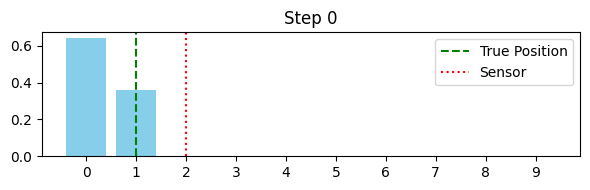

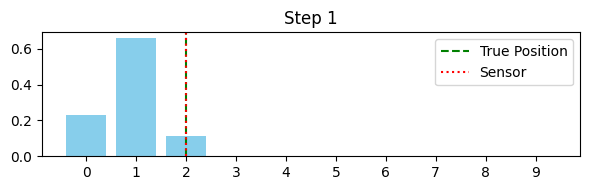

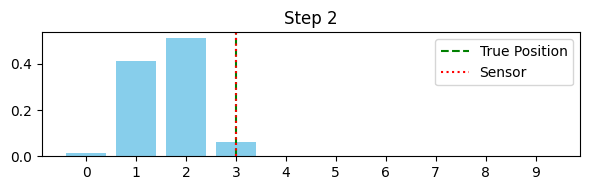

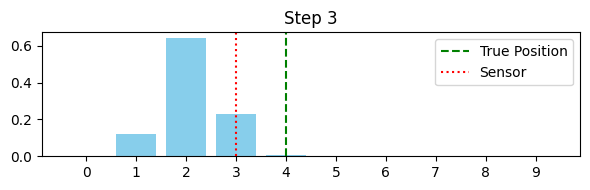

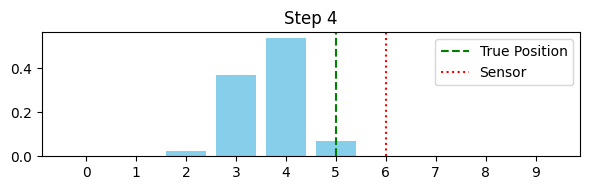

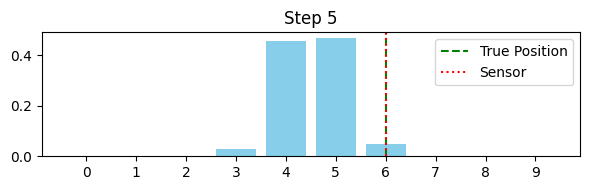

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 격자 공간 크기 (0~9)
grid_size = 10
positions = np.arange(grid_size)

# 초기 분포 (처음엔 0에 있을 확률만 1)
belief = np.zeros(grid_size)
belief[0] = 1.0

# 이동 확률 모델 (1칸 앞으로 이동, 주변 오차 고려)
def predict(belief):
    new_belief = np.zeros_like(belief)
    for i in range(grid_size):
        # 확률을 퍼뜨리기
        for offset, prob in [(-1, 0.1), (0, 0.8), (1, 0.1)]:
            prev = i - offset
            if 0 <= prev < grid_size:
                new_belief[i] += prob * belief[prev]
    return new_belief

# 센서 모델 (실제 위치 주변으로 퍼짐)
def update(belief, measurement):
    new_belief = np.zeros_like(belief)
    for i in range(grid_size):
        # 거리 기반 가우시안 유사 분포
        distance = abs(measurement - i)
        likelihood = np.exp(-distance**2 / (2 * 1.0**2))
        new_belief[i] = belief[i] * likelihood
    # 정규화
    new_belief /= np.sum(new_belief)
    return new_belief

# 시뮬레이션
true_position = 0
history = []

for t in range(6):
    true_position = min(true_position + 1, grid_size - 1)
    measurement = true_position + np.random.choice([-1, 0, 1])  # 센서 노이즈
    measurement = np.clip(measurement, 0, grid_size - 1)

    belief = predict(belief)           # 예측
    belief = update(belief, measurement)  # 관측 업데이트

    history.append((belief.copy(), true_position, measurement))

    print(f"[Step {t}] True: {true_position}, Measured: {measurement}")
    print(f"Belief: {np.round(belief, 3)}")

# 시각화
for t, (b, true_pos, meas) in enumerate(history):
    plt.figure(figsize=(6, 2))
    plt.bar(positions, b, color="skyblue")
    plt.axvline(true_pos, color='g', linestyle='--', label='True Position')
    plt.axvline(meas, color='r', linestyle=':', label='Sensor')
    plt.title(f"Step {t}")
    plt.xticks(positions)
    plt.legend()
    plt.tight_layout()
    plt.show()


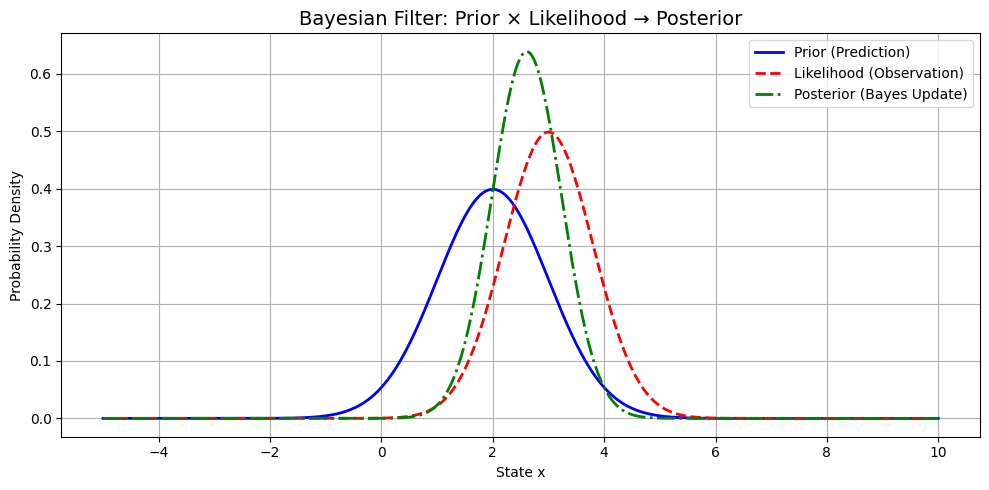

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 고해상도 x축 설정 (연속적인 1D 공간)
x = np.linspace(-5, 10, 1000)

# --- 예측 분포 (Prior) ---
mu_prior = 2.0
sigma_prior = 1.0
prior = (1 / (np.sqrt(2 * np.pi) * sigma_prior)) * np.exp(-((x - mu_prior) ** 2) / (2 * sigma_prior ** 2))

# --- 관측 분포 (Likelihood) ---
z = 3.0  # 관측값
sigma_sensor = 0.8
likelihood = (1 / (np.sqrt(2 * np.pi) * sigma_sensor)) * np.exp(-((x - z) ** 2) / (2 * sigma_sensor ** 2))

# --- Posterior 계산 (Bayes Rule 적용) ---
unnormalized_posterior = prior * likelihood
posterior = unnormalized_posterior / np.trapz(unnormalized_posterior, x)  # 정규화

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(x, prior, label="Prior (Prediction)", color="blue", linewidth=2)
plt.plot(x, likelihood, label="Likelihood (Observation)", color="red", linestyle='--', linewidth=2)
plt.plot(x, posterior, label="Posterior (Bayes Update)", color="green", linestyle='-.', linewidth=2)

plt.title("Bayesian Filter: Prior × Likelihood → Posterior", fontsize=14)
plt.xlabel("State x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


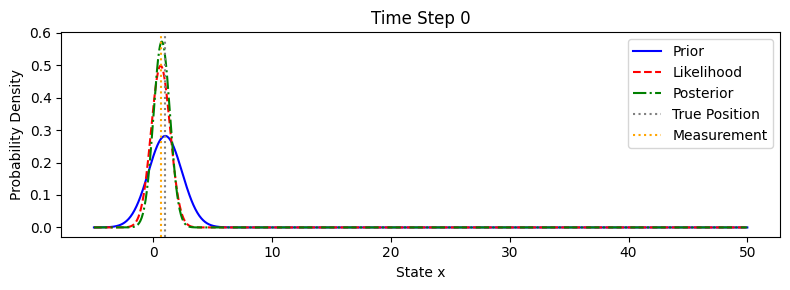

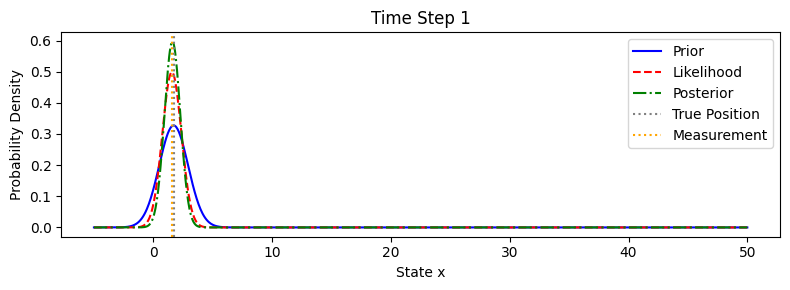

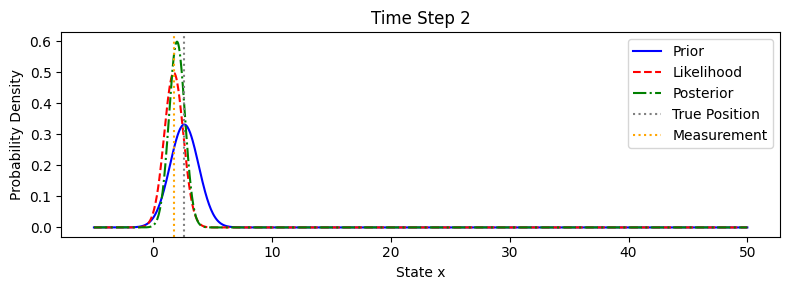

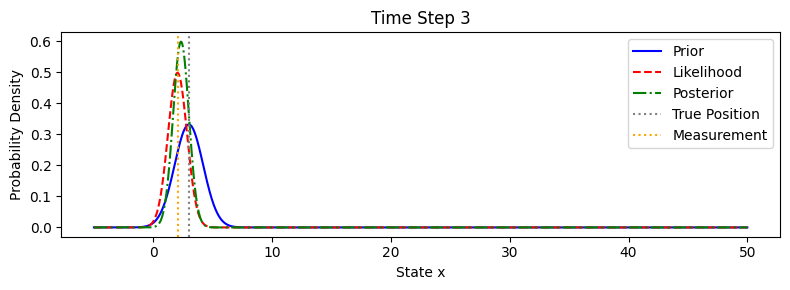

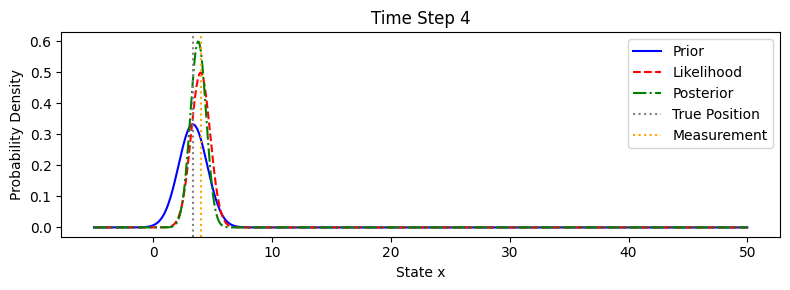

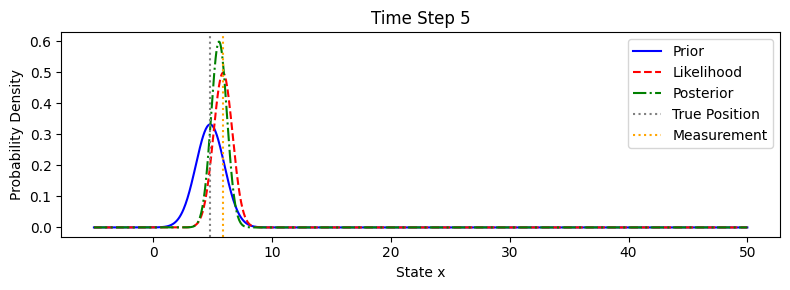

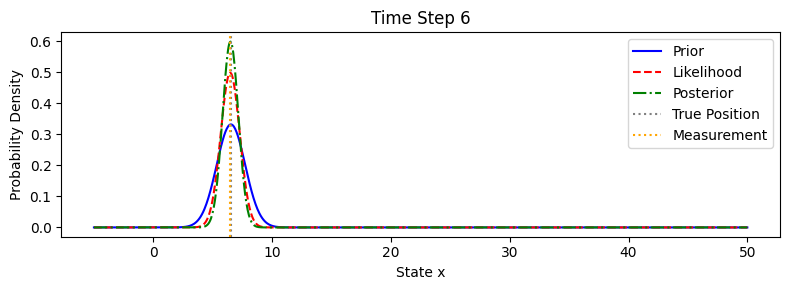

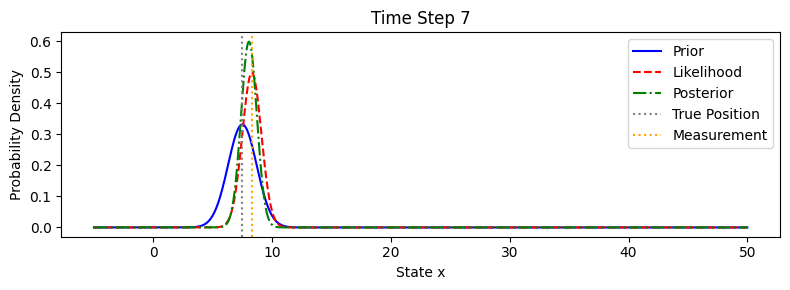

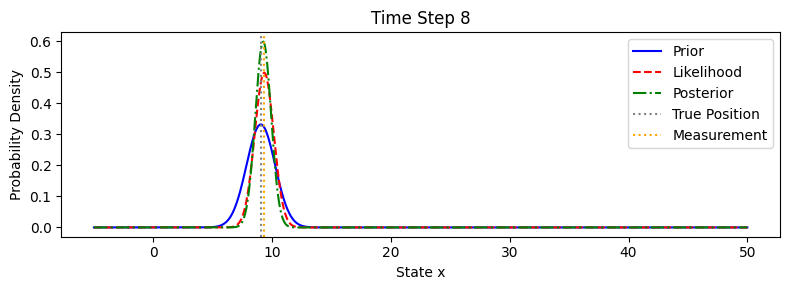

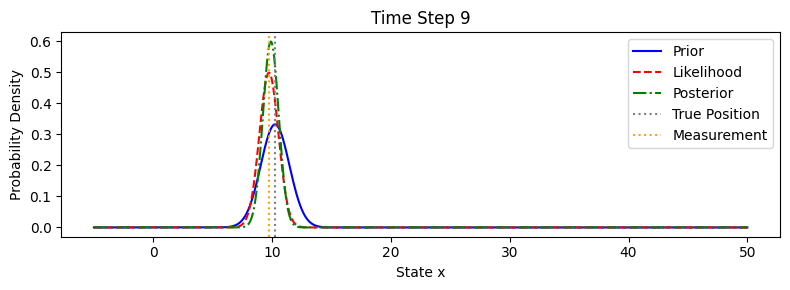

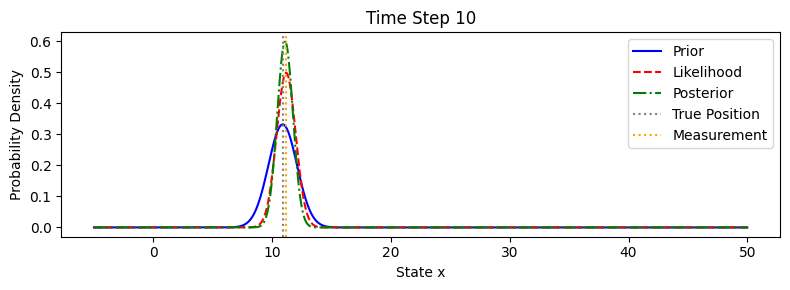

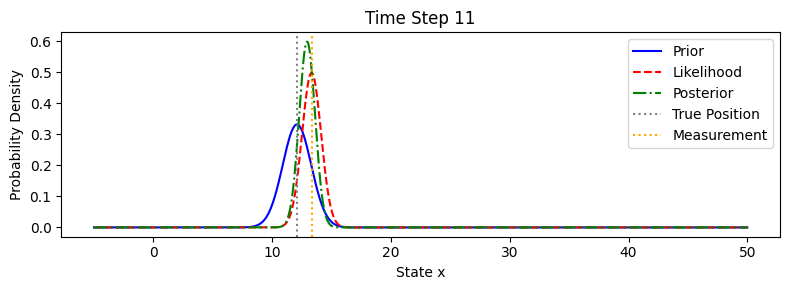

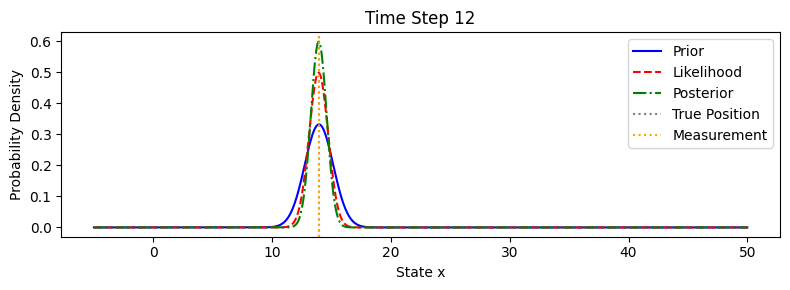

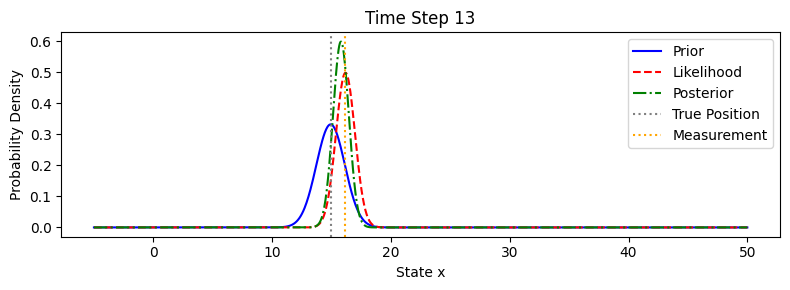

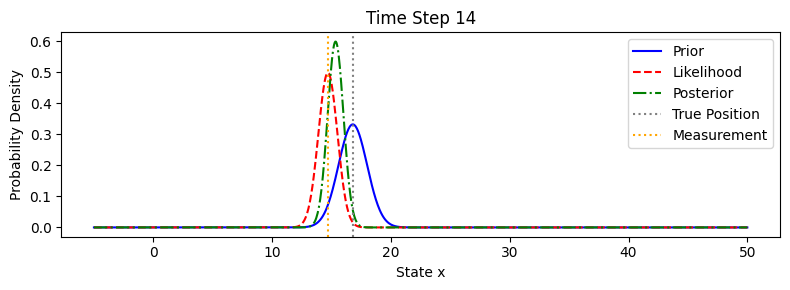

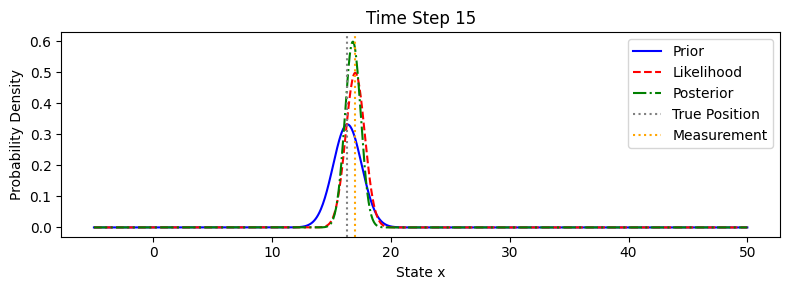

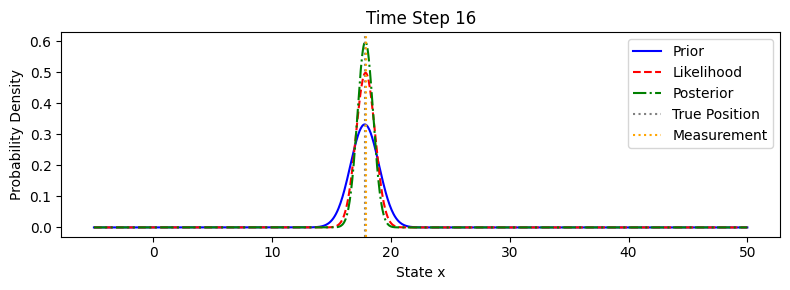

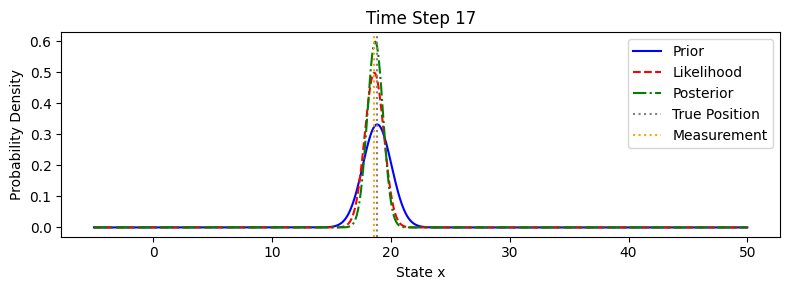

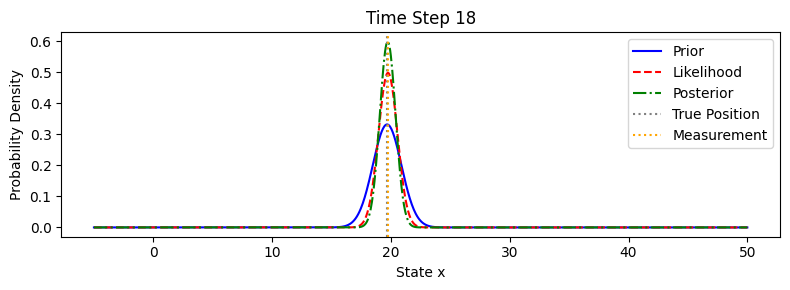

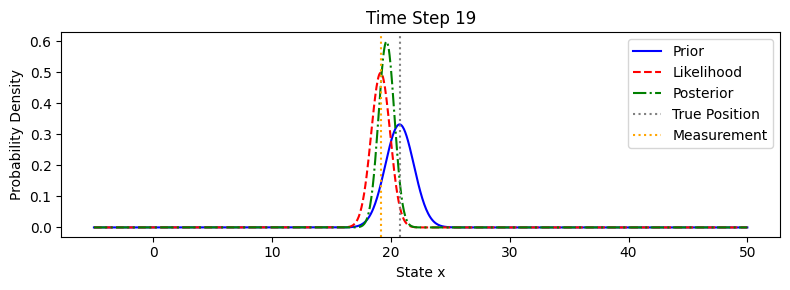

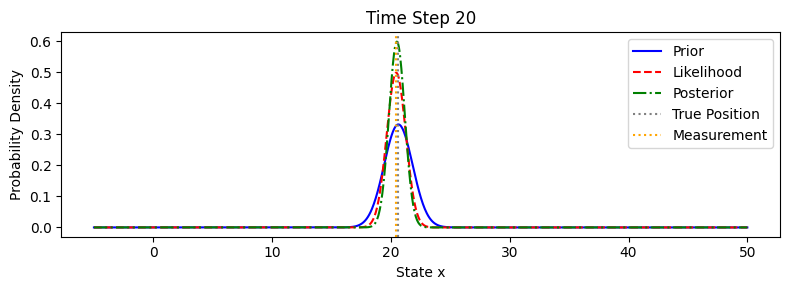

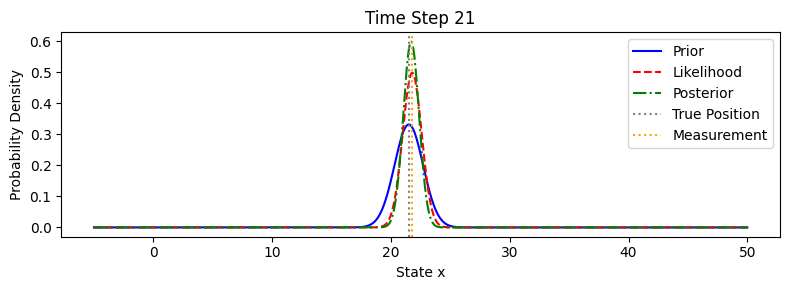

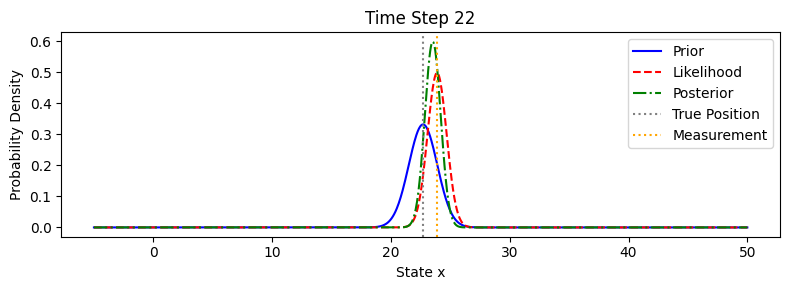

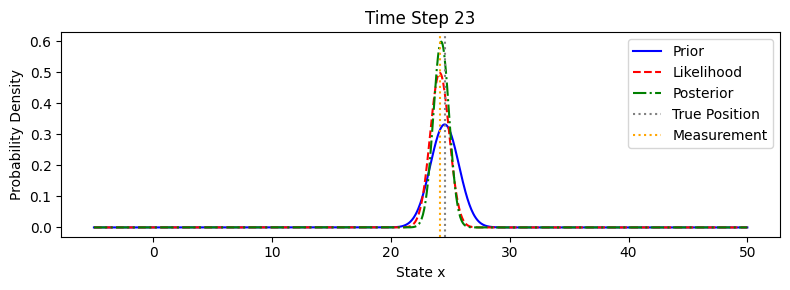

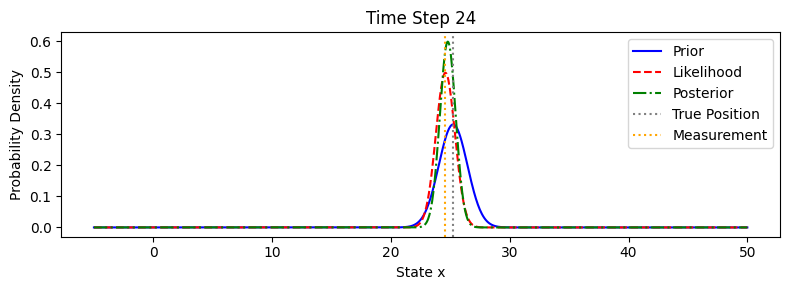

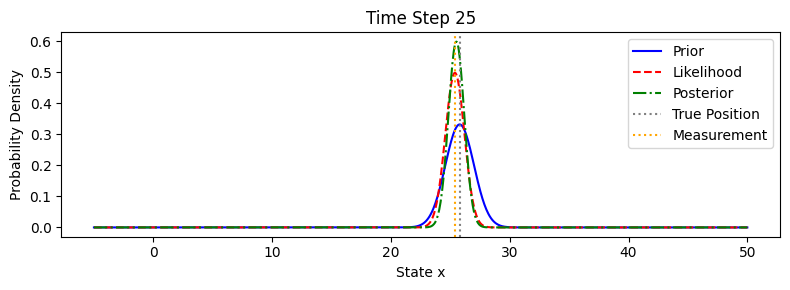

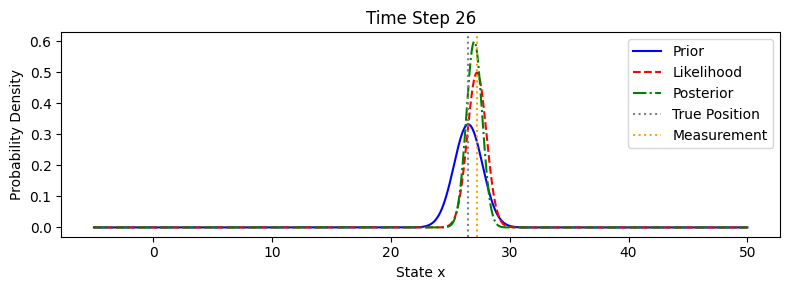

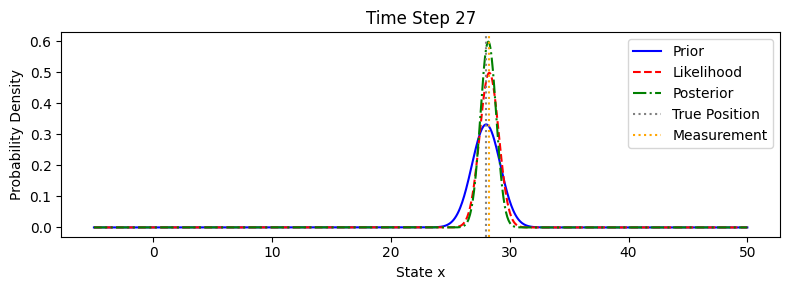

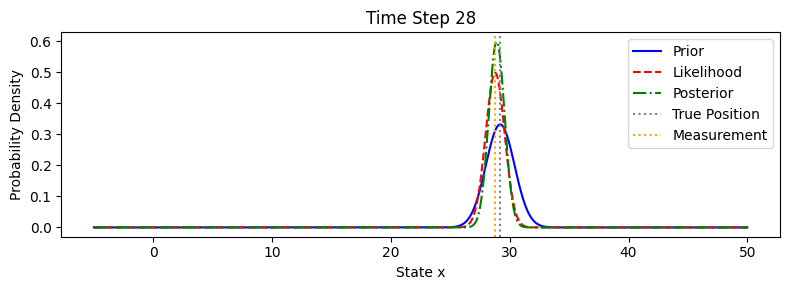

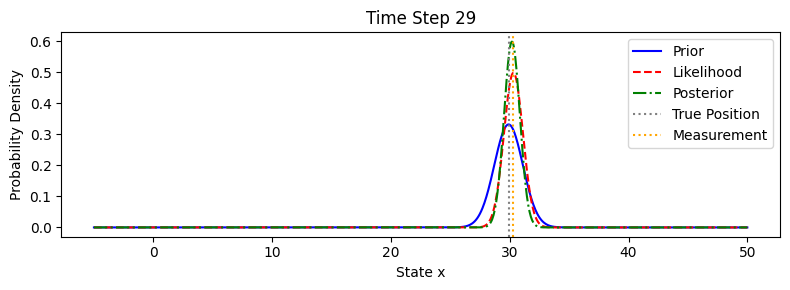

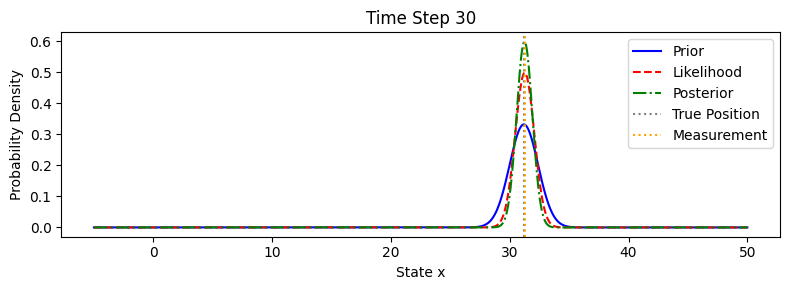

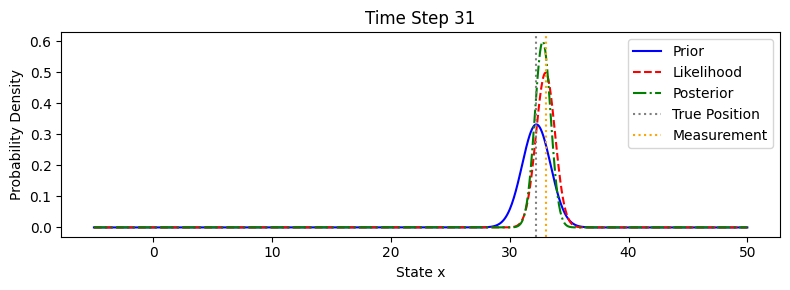

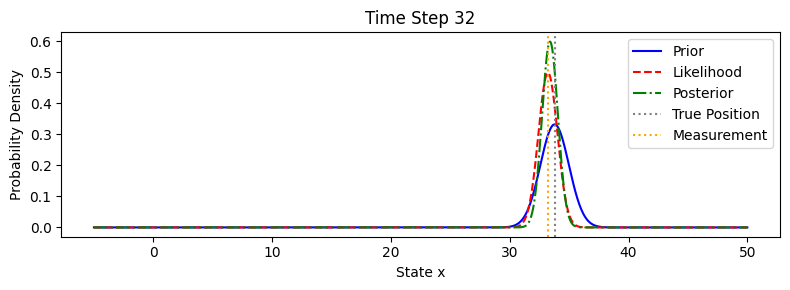

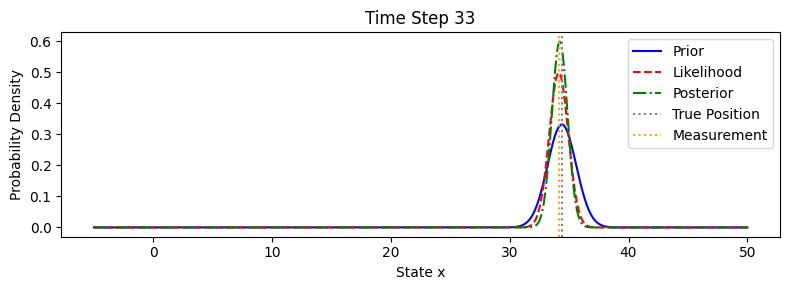

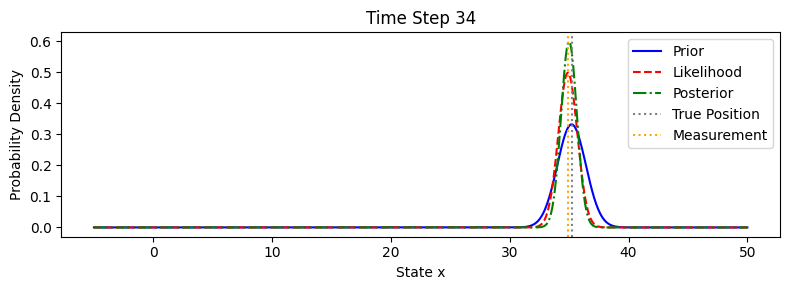

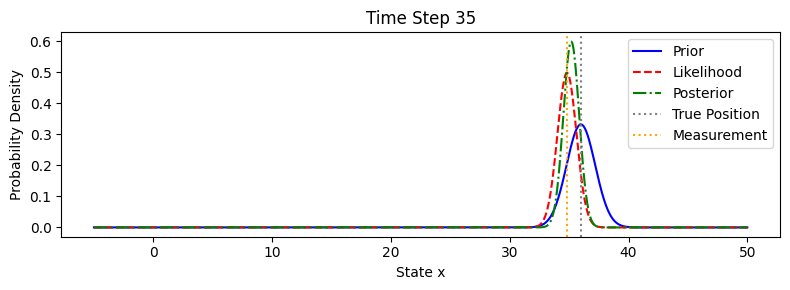

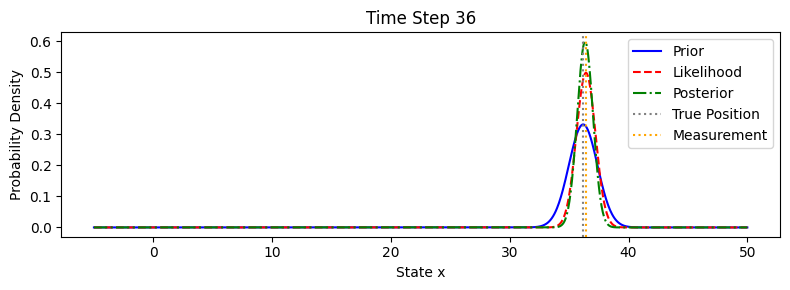

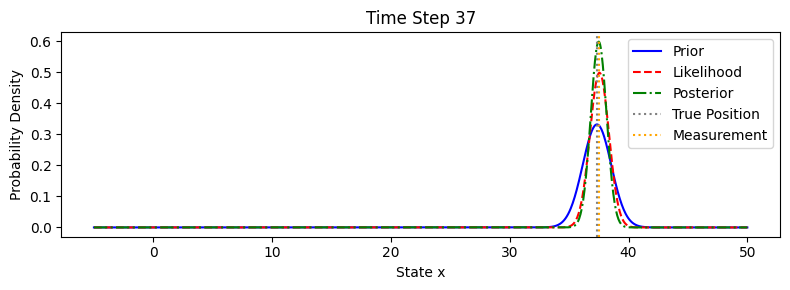

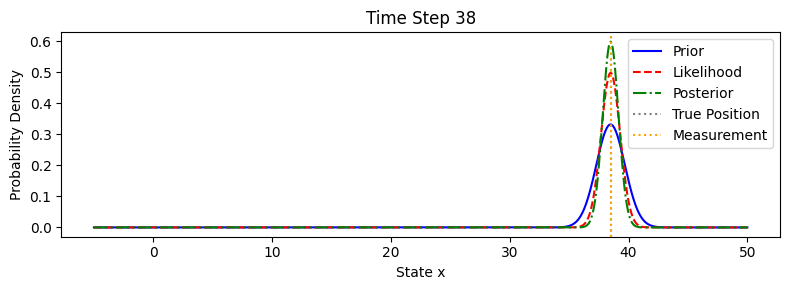

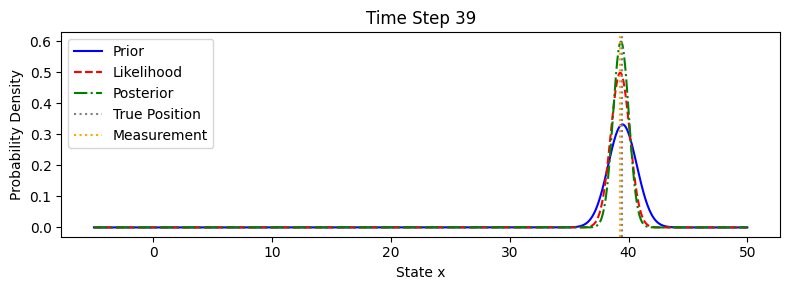

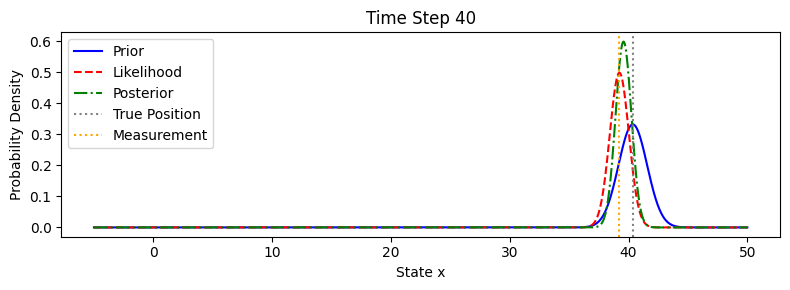

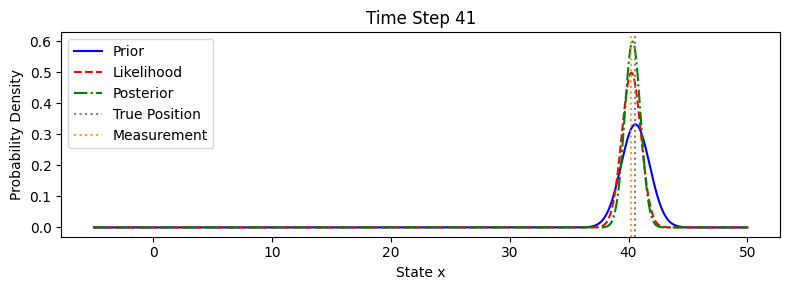

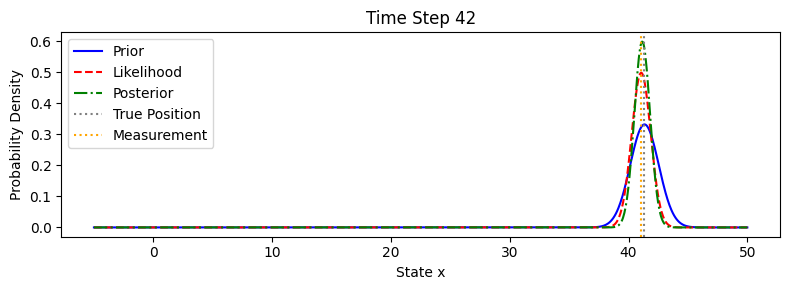

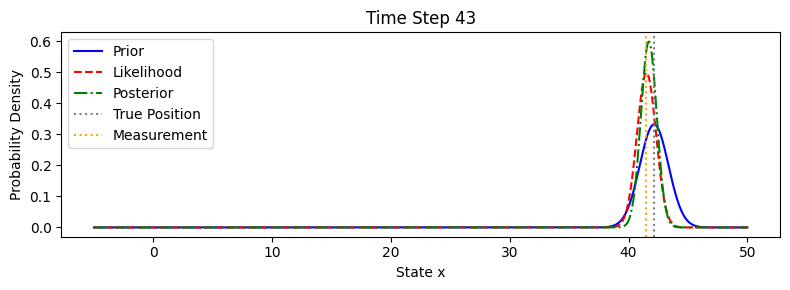

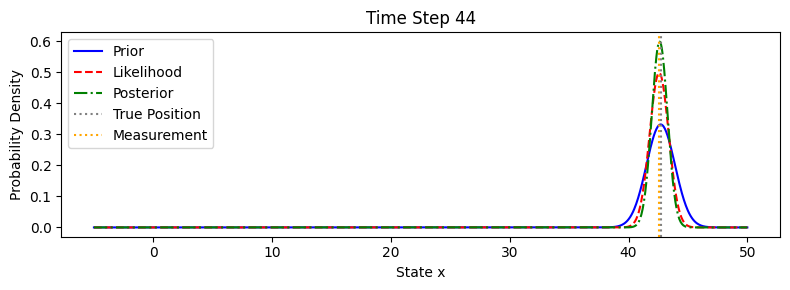

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 연속적인 1D 공간
x = np.linspace(-5, 50, 1000)

# 초기 prior 분포 설정 (첫 상태에 대한 가정)
mu_prior = 0.0
sigma_prior = 1.0
prior = (1 / (np.sqrt(2 * np.pi) * sigma_prior)) * np.exp(-((x - mu_prior) ** 2) / (2 * sigma_prior ** 2))

# 필터 설정
sigma_motion = 1.0    # 움직임에 대한 불확실성
sigma_sensor = 0.8    # 센서의 노이즈

# 시간 단계 수
T = 45
true_positions = []
estimates = []
measurements = []

# 시뮬레이션 루프
for t in range(T):
    # 실제 물체 이동 (1씩 이동)
    true_pos = mu_prior + 1.0
    true_positions.append(true_pos)
    
    # 센서 측정 (노이즈 포함)
    z = true_pos + np.random.normal(0, sigma_sensor)
    measurements.append(z)
    
    # 1. 예측 (prior를 오른쪽으로 이동하고 퍼짐 추가)
    mu_pred = mu_prior + 1.0
    sigma_pred = np.sqrt(sigma_prior**2 + sigma_motion**2)
    prior = (1 / (np.sqrt(2 * np.pi) * sigma_pred)) * np.exp(-((x - mu_pred) ** 2) / (2 * sigma_pred ** 2))

    # 2. 관측 (likelihood 생성)
    likelihood = (1 / (np.sqrt(2 * np.pi) * sigma_sensor)) * np.exp(-((x - z) ** 2) / (2 * sigma_sensor ** 2))

    # 3. Posterior 계산
    unnormalized_posterior = prior * likelihood
    posterior = unnormalized_posterior / np.trapz(unnormalized_posterior, x)
    
    # Posterior의 평균과 분산 추정
    estimated_mu = np.trapz(x * posterior, x)
    estimated_sigma = np.sqrt(np.trapz((x - estimated_mu) ** 2 * posterior, x))
    estimates.append(estimated_mu)

    # 다음 prior로 posterior를 사용
    mu_prior = estimated_mu
    sigma_prior = estimated_sigma

    # 시각화
    plt.figure(figsize=(8, 3))
    plt.plot(x, prior, label="Prior", color="blue")
    plt.plot(x, likelihood, label="Likelihood", color="red", linestyle="--")
    plt.plot(x, posterior, label="Posterior", color="green", linestyle="-.")
    plt.axvline(true_pos, color="gray", linestyle=":", label="True Position")
    plt.axvline(z, color="orange", linestyle=":", label="Measurement")
    plt.title(f"Time Step {t}")
    plt.xlabel("State x")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


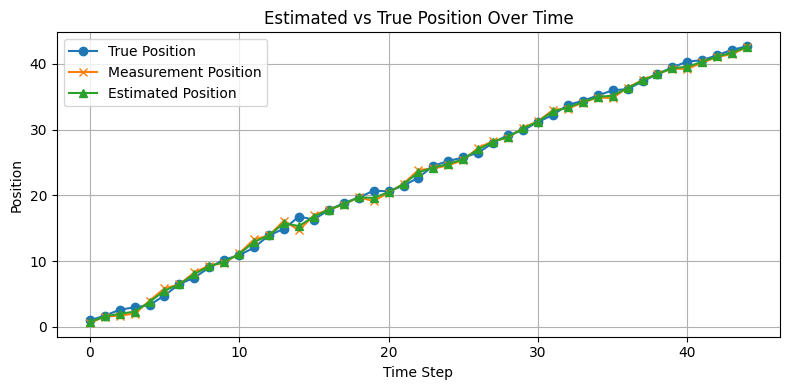

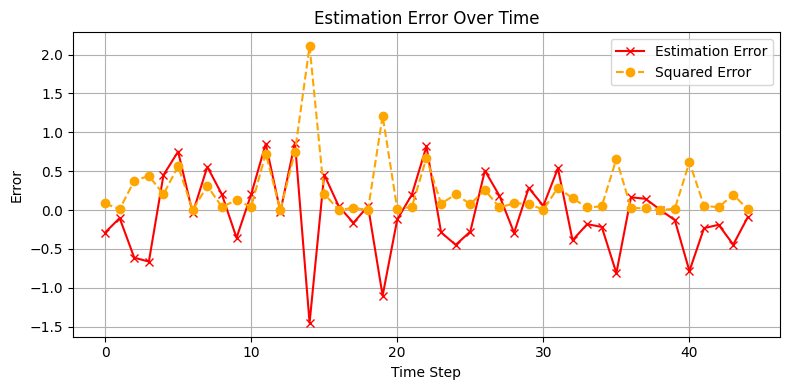

In [26]:
import matplotlib.pyplot as plt

# 시간 단계 배열
timesteps = np.arange(len(true_positions))

# 오차 계산 (추정값 - 실제값)
errors = np.array(estimates) - np.array(true_positions)
squared_errors = errors**2

# 시각화: 추정 vs 실제 위치
plt.figure(figsize=(8, 4))
plt.plot(timesteps, true_positions, label="True Position", marker='o')
plt.plot(timesteps, measurements, label="Measurement Position", marker='x')
plt.plot(timesteps, estimates, label="Estimated Position", marker='^')
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Estimated vs True Position Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 시각화: 추정 오차
plt.figure(figsize=(8, 4))
plt.plot(timesteps, errors, label="Estimation Error", color='red', marker='x')
plt.plot(timesteps, squared_errors, label="Squared Error", color='orange', linestyle='--', marker='o')
plt.xlabel("Time Step")
plt.ylabel("Error")
plt.title("Estimation Error Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sensor-only MSE: 0.6774
Bayesian Filter MSE: 0.2431


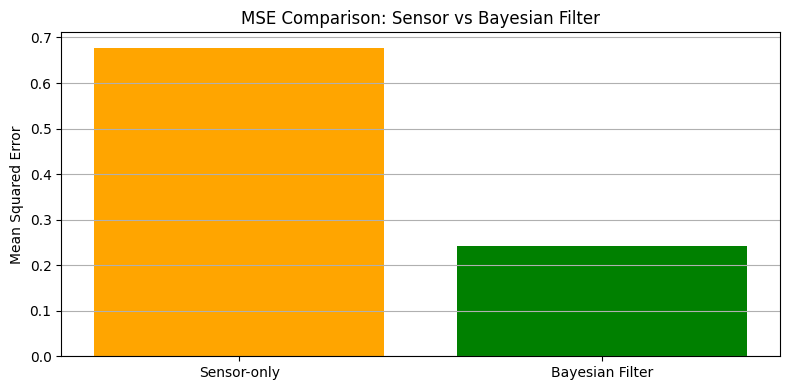

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 센서 측정값에서 추정한 위치와 실제 위치 간의 오차 계산
sensor_estimates = np.array(true_positions) + np.random.normal(0, sigma_sensor, size=len(true_positions))
sensor_errors = sensor_estimates - np.array(true_positions)
sensor_mse = np.mean(sensor_errors ** 2)

# 베이즈 필터 추정값과 실제 위치 간의 오차 계산
bayes_errors = np.array(estimates) - np.array(true_positions)
bayes_mse = np.mean(bayes_errors ** 2)

# 결과 출력
print(f"Sensor-only MSE: {sensor_mse:.4f}")
print(f"Bayesian Filter MSE: {bayes_mse:.4f}")

# 시각화
plt.figure(figsize=(8, 4))
plt.bar(["Sensor-only", "Bayesian Filter"], [sensor_mse, bayes_mse], color=["orange", "green"])
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison: Sensor vs Bayesian Filter")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

[[2. 0.]
 [0. 2.]]
[[1.57142857 0.        ]
 [0.         1.57142857]]
[[1.53012048 0.        ]
 [0.         1.53012048]]
[[1.52533609 0.        ]
 [0.         1.52533609]]
[[1.52477097 0.        ]
 [0.         1.52477097]]
[[1.52470406 0.        ]
 [0.         1.52470406]]


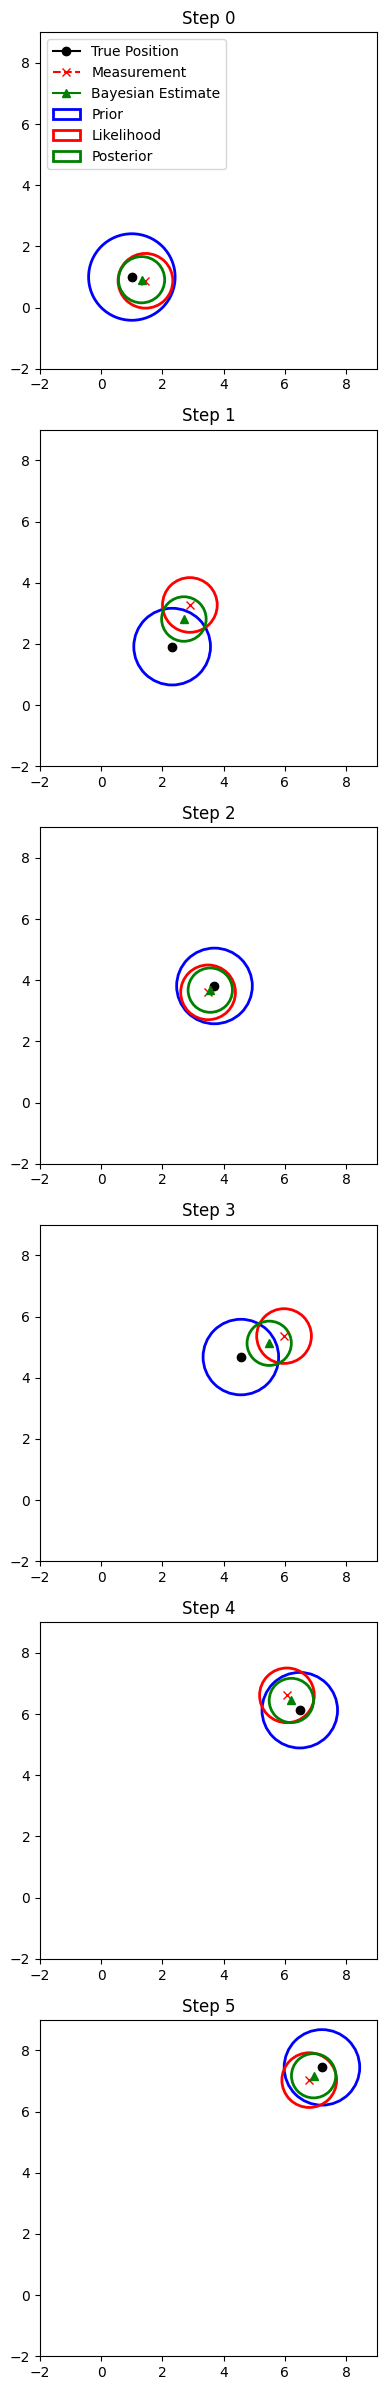

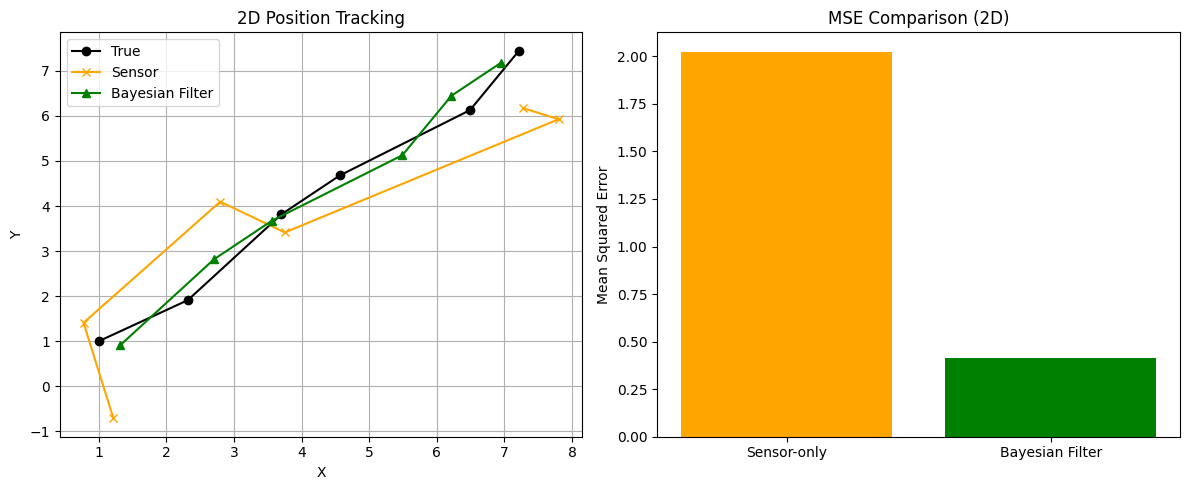

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# 시드 고정
np.random.seed(42)

# -----------------------------
# 설정
# -----------------------------
T = 6  # 시뮬레이션 시간 스텝 수

# 초기 상태 (2D 위치)
mu_prior = np.array([0.0, 0.0])
sigma_prior = np.array([[1.0, 0.0], [0.0, 1.0]])

# 이동 및 센서 노이즈 (공분산 행렬)
sigma_motion = np.array([[1.0, 0.0], [0.0, 1.0]])
sigma_sensor = np.array([[0.8, 0.0], [0.0, 0.8]])

# 실제 위치, 관측값, 필터 추정값 저장용 리스트
true_positions = []
measurements = []
estimates = []
priors = []
likelihoods = []
posteriors = []

# -----------------------------
# 가우시안 분포 시각화를 위한 함수
# -----------------------------
def plot_gaussian_ellipse(ax, mean, cov, color, label=None):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(vals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=color, fc='none', lw=2, label=label)
    ax.add_patch(ellipse)

# -----------------------------
# 베이즈 필터 시뮬레이션
# -----------------------------
for t in range(T):
    # 실제 위치 이동 (1, 1)씩
    true_pos = mu_prior + np.array([1.0, 1.0])
    true_positions.append(true_pos)
    
    # 센서 측정값 생성
    z = true_pos + np.random.multivariate_normal([0, 0], sigma_sensor)
    measurements.append(z)
    
    # 예측 단계
    mu_pred = mu_prior + np.array([1.0, 1.0])
    sigma_pred = sigma_prior + sigma_motion # 공분산 더함
    print(sigma_pred)
    priors.append((mu_pred.copy(), sigma_pred.copy()))
    
    #관측 단계
    likelihoods.append((z.copy(), sigma_sensor.copy()))
        
    # 업데이트 단계 (가우시안 곱의 결과: 정규분포 평균과 공분산 공식)
    sigma_post_inv = np.linalg.inv(sigma_pred) + np.linalg.inv(sigma_sensor)
    sigma_post = np.linalg.inv(sigma_post_inv)
    
    mu_post = sigma_post @ (np.linalg.inv(sigma_pred) @ mu_pred + np.linalg.inv(sigma_sensor) @ z)
    posteriors.append((mu_post.copy(), sigma_post.copy()))
    estimates.append(mu_post)
    
    # 다음 prior로 posterior 사용
    mu_prior = mu_post
    sigma_prior = sigma_post

# -----------------------------
# subplot 1: 각 단계별 가우시안 시각화
# -----------------------------
fig1, axs1 = plt.subplots(T, 1, figsize=(4, 4*T))
true_positions = np.array(true_positions)
measurements = np.array(measurements)
estimates = np.array(estimates)

for t in range(T):
    ax = axs1[t]
    ax.plot(true_positions[t, 0], true_positions[t, 1], 'ko-', label="True Position")
    ax.plot(measurements[t, 0], measurements[t, 1], 'rx--', label="Measurement")
    ax.plot(estimates[t, 0], estimates[t, 1], 'g^-', label="Bayesian Estimate")

    plot_gaussian_ellipse(ax, priors[t][0], priors[t][1], 'blue', label="Prior")
    plot_gaussian_ellipse(ax, likelihoods[t][0], likelihoods[t][1], 'red', label="Likelihood")
    plot_gaussian_ellipse(ax, posteriors[t][0], posteriors[t][1], 'green', label="Posterior")

    ax.set_title(f"Step {t}")
    ax.set_xlim(-2, T + 3)
    ax.set_ylim(-2, T + 3)
    ax.set_aspect('equal')
    if t == 0:
        ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# -----------------------------
# subplot 2: 추정 위치 비교 & MSE
# -----------------------------

# 에러 계산
sensor_estimates = true_positions + np.random.multivariate_normal([0, 0], sigma_sensor, size=T)
sensor_errors = sensor_estimates - true_positions
sensor_mse = np.mean(np.sum(sensor_errors**2, axis=1))

bayes_errors = estimates - true_positions
bayes_mse = np.mean(np.sum(bayes_errors**2, axis=1))

fig2, axs2 = plt.subplots(1, 2, figsize=(12, 5))

# 위치 비교
axs2[0].plot(true_positions[:, 0], true_positions[:, 1], label="True", color='black', marker='o')
axs2[0].plot(sensor_estimates[:, 0], sensor_estimates[:, 1], label="Sensor", color='orange', marker='x')
axs2[0].plot(estimates[:, 0], estimates[:, 1], label="Bayesian Filter", color='green', marker='^')
axs2[0].set_title("2D Position Tracking")
axs2[0].set_xlabel("X")
axs2[0].set_ylabel("Y")
axs2[0].legend()
axs2[0].grid(True)

# MSE 비교
axs2[1].bar(["Sensor-only", "Bayesian Filter"], [sensor_mse, bayes_mse], color=["orange", "green"])
axs2[1].set_ylabel("Mean Squared Error")
axs2[1].set_title("MSE Comparison (2D)")

plt.tight_layout()
plt.show()
